# Descrizione progetto

## Contesto ed Obiettivo del Progetto

Il mondo digitale, in particolare quello delle app, sta vivendo un momento d'oro. Lo smartphone, ormai diffuso a tutte le età, è diventato una parte integrante e inscindibile della vita di milioni di persone. **Questa pervasività ha rivoluzionato il modo in cui interagiamo con il mondo**, consentendo di accedere a servizi, informazioni e intrattenimento con un semplice click. Di conseguenza, le app hanno un potenziale straordinario per incidere positivamente nella quotidianità degli individui.

Tuttavia, **l'uso prolungato e compulsivo degli smartphone può avere anche risvolti negativi**, come la dipendenza dal cellulare, influenzando il benessere e le relazioni sociali.

**L'obiettivo di questo progetto è sviluppare un'app che entri a far parte della vita quotidiana delle persone, avendo un impatto positivo**. Per raggiungere questo scopo, l'analisi dei dati delle app presenti sul Google Play Store sarà fondamentale: non per decidere il tipo di app da creare, ma per individuare la categoria più promettente in cui svilupparla.

L'approccio **data-driven** permetterà di identificare tendenze, correlazioni e opportunità all'interno del mercato delle app, garantendo una scelta informata sulla categoria in cui lanciare il nostro progetto e massimizzare il suo impatto positivo sugli utenti.

## Strategia e Focus del Progetto

Questo progetto si concentra sull'analisi del dataset delle app presenti nel Google Play Store e prevede i seguenti passaggi:

1. **Data Selection**:
   - Selezionare il dataset di app disponibili sul Google Play Store che sarà utilizzato per l'analisi, includendo informazioni chiave come categorie, rating, recensioni, numero di installazioni, prezzo e altro.

2. **Data Cleaning and Transformation**:
   - Pulizia e trasformazione dei dati per rimuovere errori, valori mancanti o anomalie e preparare il dataset per l'analisi approfondita.

3. **Data Exploration & Data Visualization**:
   - La fase più corposa del progetto, che prevede l'esplorazione delle variabili chiave:
     - **Analisi delle Categorie**: Identificare le categorie di app più rilevanti e significative in base a metriche come numero di app, popolarità e trend emergenti.
     - **Correlazioni tra le Variabili**: Esplorare le correlazioni tra variabili come **rating**, **recensioni**, **numero di installazioni**, **prezzo**, ecc., per comprendere i fattori che influenzano il successo di un'app.
     - **Identificazione degli Outliers**: Individuare le app che si distinguono per performance insolite, per analizzare i fattori chiave che ne hanno determinato il successo o l'insuccesso.
     - **Visualizzazione dei Risultati**: Creare grafici e tabelle che mostrino i principali insight emersi dall'analisi.

4. **Conclusioni**:
   - Sintesi dei principali risultati ottenuti dall'analisi dei dati, con una chiara identificazione della categoria più promettente per lo sviluppo della nostra app. Questa fase includerà raccomandazioni strategiche basate sugli insight raccolti.


# 1. Data selection

### Data Selection
### Introduzione ai Dataset Utilizzati

Il progetto si sviluppa utilizzando due dataset principali, scaricati da **Kaggle**, per l'analisi del mercato delle applicazioni Android disponibili su Google Play Store. Questi dataset offrono una panoramica completa delle caratteristiche e delle recensioni delle app presenti su questa piattaforma, con l'obiettivo di trarre spunti utili per lo sviluppo e il successo di nuove applicazioni.

#### Dataset 1: Google Play Store Apps

- **Nome del file**: `googleplaystore.csv`
- Questo dataset contiene informazioni relative a circa 10.000 app disponibili sul Google Play Store. Include dati come il nome dell'app, la categoria, il numero di recensioni, il rating, la dimensione dell'app, e altro ancora.
- Il dataset è stato raccolto tramite web scraping e fornisce una base solida per l'analisi delle tendenze e delle dinamiche del mercato Android.
  
#### Dataset 2: Google Play Store User Reviews

- **Nome del file**: `googleplaystore_user_reviews.csv`
- Questo dataset raccoglie le recensioni degli utenti sulle app presenti nel Play Store. Contiene informazioni come il testo della recensione, il sentimento espresso (positivo, negativo, neutrale), la polarità e la soggettività del commento.
- Le recensioni rappresentano una risorsa preziosa per comprendere il feedback degli utenti, le loro preferenze e le aree in cui gli sviluppatori possono migliorare i loro prodotti.

#### Obiettivo dell'Analisi

Attraverso l'analisi congiunta di questi due dataset, l'obiettivo del progetto è quello di trarre **insights** utili per il mercato delle app Android, fornendo indicazioni su come migliorare la qualità delle applicazioni, aumentare il numero di download e migliorare il rating complessivo. Le informazioni estratte possono aiutare sviluppatori e aziende a prendere decisioni strategiche per avere successo nel competitivo mercato delle app.


In [56]:
# Importo le librerie 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display


# Aumento il numero di righe visualizzabili 
import json
pd.set_option('display.max_rows', 1000)  

In [57]:
# Importo i dataset
df1 = pd.read_csv(r"C:\Users\simon\Desktop\S2i\Python\Progetto Pandas\googleplaystore.csv")
df2 = pd.read_csv(r"C:\Users\simon\Desktop\S2i\Python\Progetto Pandas\googleplaystore_user_reviews.csv")

In [58]:
# Unisco i due dataset
df_null = pd.merge(df1 , df2, on = "App")

In [59]:
# Creo una copia del DataFrame fuso ed elimina i valori nulli
df_originale = df_null.copy()  
df = df_originale.dropna()

In [60]:
# Creo una copia del dataframe dove simulare l'eliminazione delle righe con valori mancanti
test_drop = df_originale.dropna()

# Valuto l'impatto, calcolando la percentuale delle righe eliminate
rows_removal_perc = round((1-test_drop.shape[0]/df_originale.shape[0])*100,2)

print(f"\nRighe nel Dataframe originale: {df_originale.shape[0]}.")

print(f"\nRighe rimanenti dopo aver rimosso quelle con valori mancanti: {test_drop.shape[0]}")

print(f'\nRimuovendo le righe contenenti valori mancanti si sono eliminati il {rows_removal_perc}% dei dati!')


Righe nel Dataframe originale: 122662.

Righe rimanenti dopo aver rimosso quelle con valori mancanti: 72566

Rimuovendo le righe contenenti valori mancanti si sono eliminati il 40.84% dei dati!


Pur avendo scremato in maniera significativa il dataset, ritengo che 72566 righe rappresentino un campione sufficiente per l'elaborazione dell'app.

---
---
# 2. Data Cleaning and Transformation

Questa sezione contiene le fasi di pulizia e preparazione dei Dati per la successiva analisi e visualizzazione.

In [63]:
# Controllo le dimensioni del set di dati e vado a leggere cosa contengono le colonne, fornendo una anteprima con head
print(f"Dimensioni del dataframe: {df.shape[0]} righe e {df.shape[1]} colonne.")
print("\nColonne del dataframe:\n", df.columns)
df_originale.head()

Dimensioni del dataframe: 72566 righe e 17 colonne.

Colonne del dataframe:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [64]:
# Elimino il segno "+" e gli spazi vuoti dalle installs, converto in type integer
df["Installs"] = df["Installs"].str.replace(r"\+", ' ', regex = True)
df["Installs"] = df["Installs"].str.replace(r",", '',regex = True)
df["Installs"] = df["Installs"].str.replace(r" ", '',regex = True)
df["Installs"] = df["Installs"].astype(int)

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\1756875217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Installs"] = df["Installs"].str.replace(r"\+", ' ', regex = True)
C:\Users\simon\AppData\Local\Temp\ipykernel_13308\1756875217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Installs"] = df["Installs"].str.replace(r",", '',regex = True)
C:\Users\simon\AppData\Local\Temp\ipykernel_13308\1756875217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [66]:
# Converto i rating in type float
df["Rating"] = df["Rating"].astype(float)

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\3659286376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(float)


In [67]:
#  Elimino il segno "$" e converto i prezzi in type float
df["Price"] = df["Price"].str.replace(r"\$",'', regex = True)
df["Price"] = df["Price"].astype(float)

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\58356209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].str.replace(r"\$",'', regex = True)
C:\Users\simon\AppData\Local\Temp\ipykernel_13308\58356209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].astype(float)


In [68]:
# Converto le reviews in type integer
df["Reviews"] = df["Reviews"].astype(int)

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\640210194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"] = df["Reviews"].astype(int)


In [69]:
# Elimino le colonne non necessarie
df.drop(columns = ["Content Rating", "Translated_Review", "Android Ver", "Genres","Last Updated", "Current Ver", "Android Ver"], inplace = True)

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\1208955160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["Content Rating", "Translated_Review", "Android Ver", "Genres","Last Updated", "Current Ver", "Android Ver"], inplace = True)



Ho deciso di eliminare le seguenti colonne dal DataFrame:

- **Content Rating**
- **Translated_Review**
- **Android Ver**
- **Genres**
- **Last Updated**
- **Current Ver**

Queste colonne sono state rimosse perché contenevano informazioni qualitative o irrilevanti per la mia analisi. Elementi come la versione di Android, il genere dell'app o le recensioni tradotte non sono utili per l'obiettivo della mia ricerca, che si concentra maggiormente su dati quantitativi come recensioni, rating e dimensione delle app. 

In particolare, la colonna **Genres** è stata rimossa perché risultava molto simile alla colonna **Category**, rendendola ridondante.


In [71]:
# 1. Converto i valori di "Size" in stringhe 
df["Size"] = df["Size"].astype(str)

# 2. Rimuovo il carattere "M" dalla colonna "Size"
df["Size"] = df["Size"].str.replace(r"M", '', regex=True)

# 3. Converto la colonna "Size" in valori numerici (float), gestendo eventuali errori
df["Size"] = pd.to_numeric(df["Size"], errors='coerce')

C:\Users\simon\AppData\Local\Temp\ipykernel_13308\434092610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size"] = df["Size"].astype(str)
C:\Users\simon\AppData\Local\Temp\ipykernel_13308\434092610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size"] = df["Size"].str.replace(r"M", '', regex=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_13308\434092610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [72]:
# Un'anteprima del dataframe 
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.800000,0.900000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Neutral,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
10,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
11,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.433333,0.466667


# 3. Data Exploration & Data Visualization

**Nota metodologica**

In questo notebook verranno utilizzate esclusivamente scale lineari per la rappresentazione grafica dei dati. Per garantire una migliore leggibilità dei numeri di grandi dimensioni, si impiegherà la notazione scientifica sugli assi. Questo approccio consente di visualizzare in modo compatto e chiaro valori elevati utilizzando potenze di 10, mantenendo tuttavia una scala lineare per l'interpretazione dei dati.


## 3.1 Analisi delle categorie e del mercato

In [76]:
# Verifico quale sia il numero totale di App
n_app = df["App"].nunique()

In [77]:
# Verifico quale sia il numero totale di Categorie
n_category = df["Category"].nunique()

In [78]:
# Identifico le categorie con il numero maggiore di installazioni
instxcat = df.groupby("Category").Installs.sum()
df_instxcat= instxcat.to_frame()
sorted_instxcat = df_instxcat.sort_values(by = "Installs",ascending = False)

In [79]:
# Numero di reviews per ogni app
revxapp = df.groupby("App")["Reviews"].sum().reset_index()
sortedrevxapp = revxapp.sort_values(by= "Reviews", ascending = False).drop_duplicates(subset = "App")

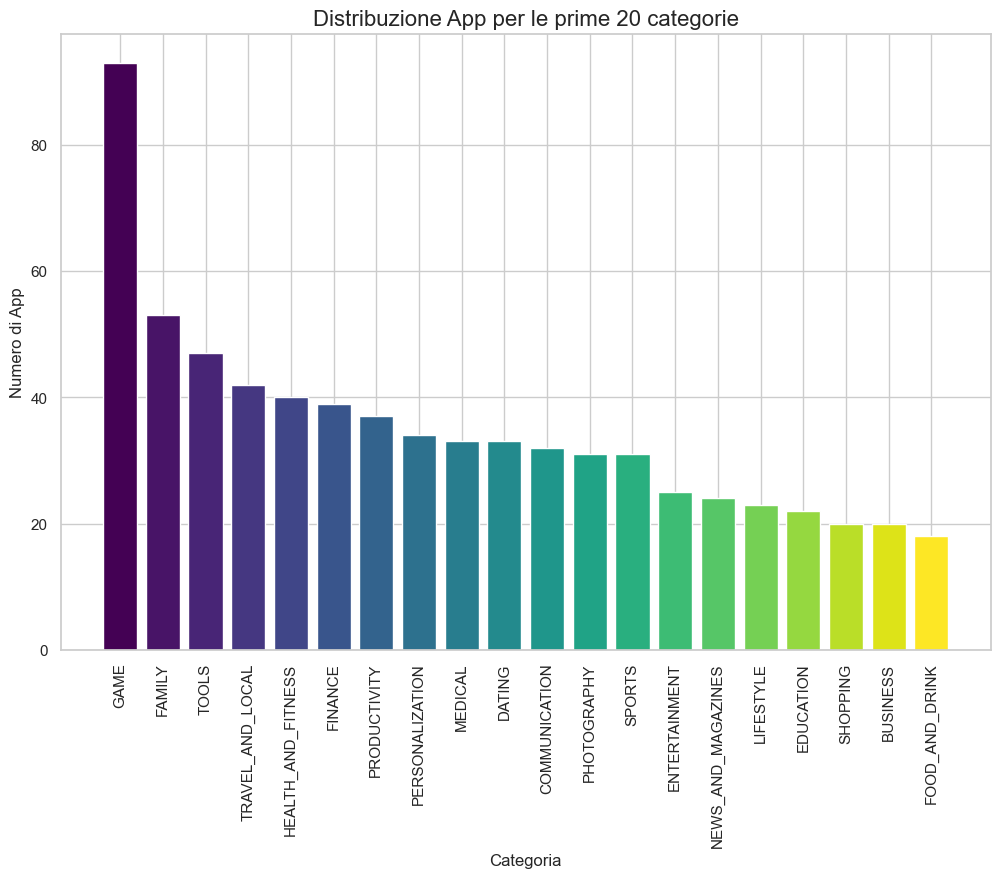

In [80]:
# Rimuovo i duplicati per 'App' e conto il numero di app per categoria
df_appxcat = df.drop_duplicates(subset="App").groupby("Category").size().sort_values(ascending=False).to_frame(name="AppCount")

# Seleziono solo le prime 20 categorie
top_20_categories = df_appxcat.head(20)

plt.figure(figsize=(12, 8))

colors = cm.viridis(np.linspace(0, 1, len(top_20_categories)))

plt.bar(top_20_categories.index, top_20_categories["AppCount"], color=colors)
plt.xticks(rotation=90)
plt.title('Distribuzione App per le prime 20 categorie', fontsize=16)
plt.xlabel('Categoria')
plt.ylabel('Numero di App')

plt.show()

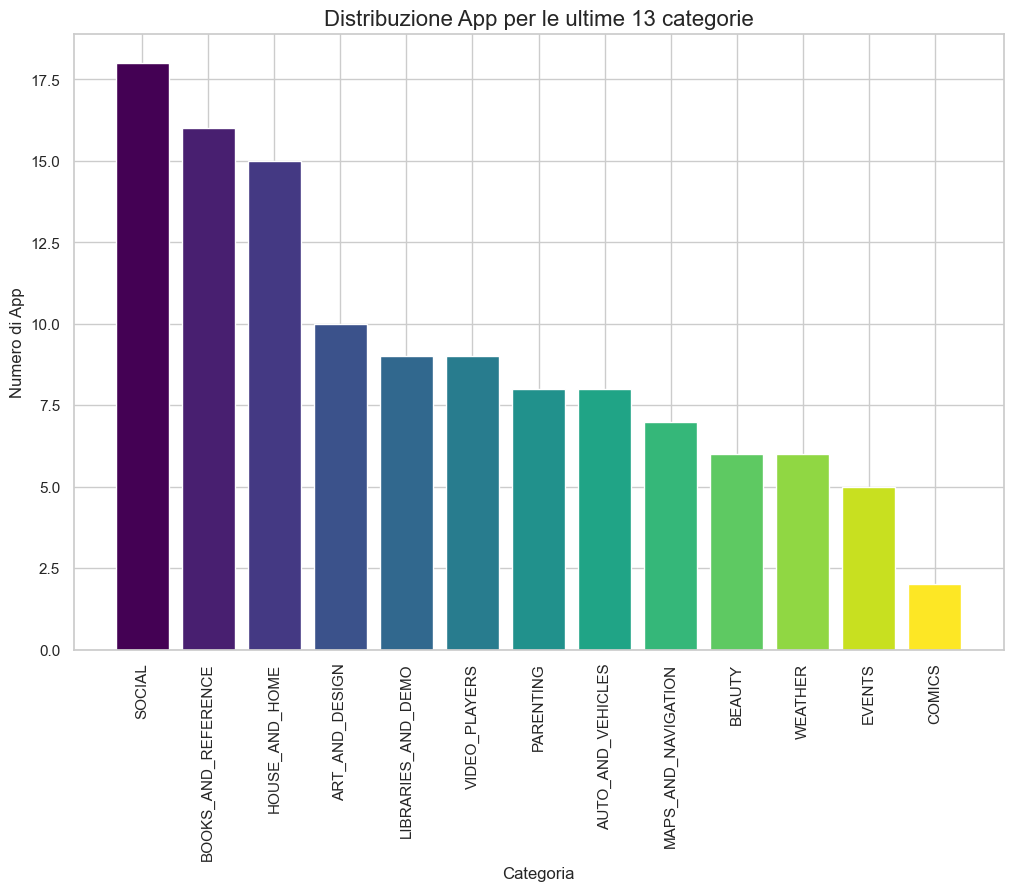

In [81]:
# Seleziono le ultime 13 categorie
last_13_categories = df_appxcat.tail(13)

# Creazione del grafico a barre con sfumatura di colori per le ultime 13 categorie
plt.figure(figsize=(12, 8))

colors = cm.viridis(np.linspace(0, 1, len(last_13_categories)))

plt.bar(last_13_categories.index, last_13_categories["AppCount"], color=colors)
plt.xticks(rotation=90)
plt.title('Distribuzione App per le ultime 13 categorie', fontsize=16)
plt.xlabel('Categoria')
plt.ylabel('Numero di App')

plt.show()

Il primo grafico illustra la distribuzione percentuale delle prime 20 categorie di app. Si osserva che la categoria **Game** rappresenta la fetta più grande con **29.4%** delle app, evidenziando la sua dominanza nel mercato delle applicazioni. Altre categorie come **Family** e **Tools** seguono con percentuali più basse, rispettivamente **15.8%** e **13.4%**, mentre categorie come **Social** e **Books and Reference** si attestano sotto il **5%**.

D'altra parte, il secondo grafico a torta rappresenta le ultime 13 categorie, dove la categoria con il numero maggiore di app è **Beauty**, con solo **4.9%**. Le categorie più piccole, come **Comics**, rappresentano una frazione minima del totale, con solo **0.2%**.

Questa distribuzione suggerisce che le categorie con un numero maggiore di app tendono a essere le più forti nel mercato. Tuttavia, questo dato da solo non fornisce un quacompletocomp; le categorie con meno app potrebbero rappresentare settori di mercato meno saturi, quindi più aperti alla conenzaleto. Adesso proseguirò analizzando le installazioni per categoria.


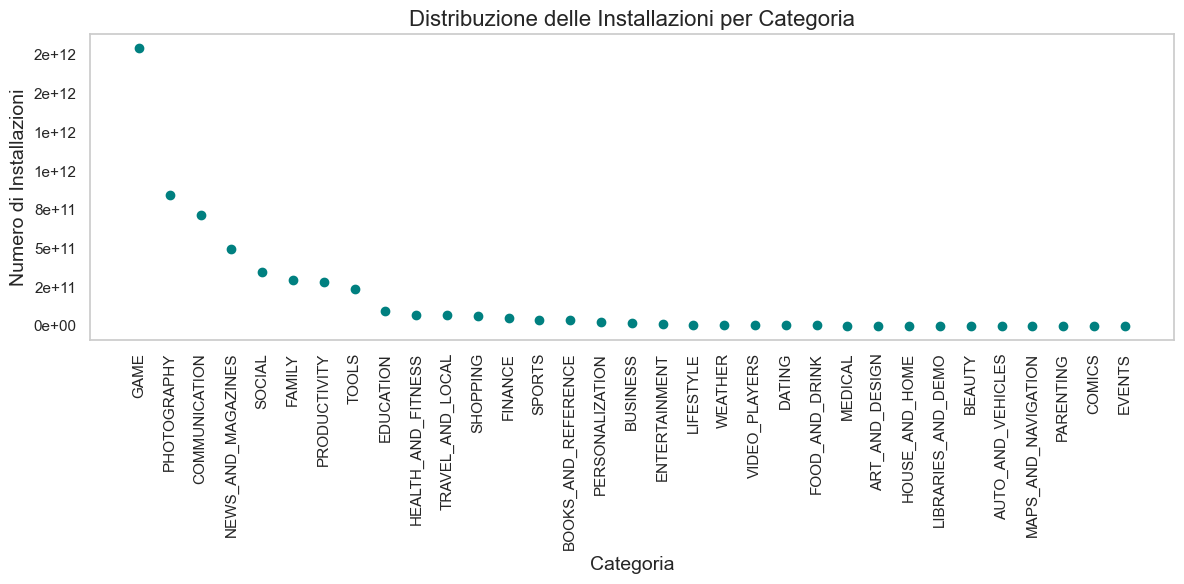

In [83]:
# Creo un DataFrame per tutte le categorie
df_all_categories = sorted_instxcat.reset_index()
df_all_categories.columns = ['Category', 'Installs']

# Generazione del grafico a dispersione
plt.figure(figsize=(12, 6))
plt.scatter(x=df_all_categories['Category'], y=df_all_categories['Installs'], color='teal')

plt.title('Distribuzione delle Installazioni per Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Numero di Installazioni', fontsize=14)

plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0e}'))

plt.tight_layout()
plt.grid()
plt.show()


Il numero totale di installazioni per categoria offre una doppia lettura: le categorie con il maggior numero di installazioni possono rappresentare un'opportunità, poiché indicano app molto in voga. Tuttavia, un alto numero di installazioni può anche suggerire un mercato saturo, dove la concorrenza è elevata e le possibilità di emergere sono limitate.

Al contrario, le categorie con poche installazioni potrebbero rivelare mercati aperti, pronti per l'innovazione e lo sviluppo di nuove app. Tuttavia, un basso numero di installazioni potrebbe anche indicare scarso interesse da parte degli utenti.

Dopo aver esaminato i grafici riguardanti la distribuzione delle installazioni per categoria e la relazione tra numero di app e installazioni, è interessante approfondire ulteriormente l'analis con la media del rating per ogni categoria.i.


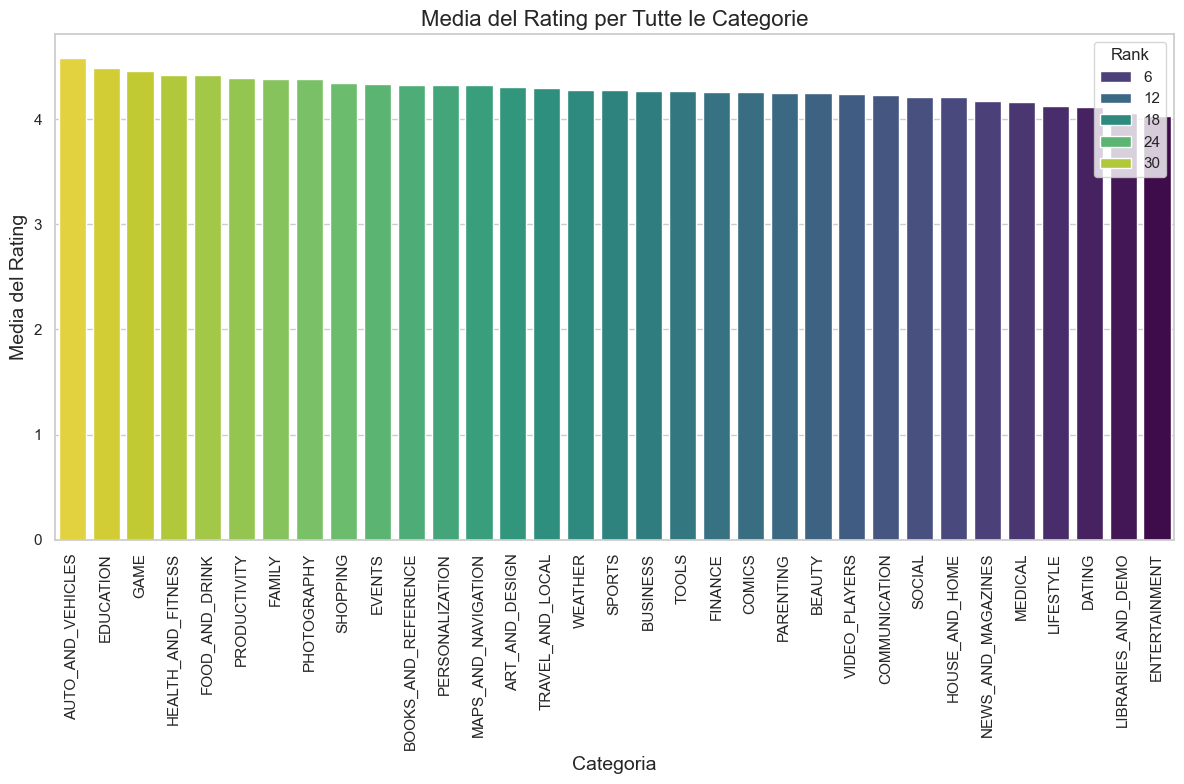

In [85]:
# Identifico la media del rating per ogni categoria
mean = df.groupby("Category")["Rating"].mean()
mean_sorted = mean.sort_values(ascending=False)
df_meansorted = mean_sorted.to_frame()
meanxcat = df_meansorted.rename(columns={"Rating": "AvgRating"}, inplace=True)

# Imposto lo stile per il grafico
sns.set(style="whitegrid")

# Creo un DataFrame per tutte le categorie
df_all_categories = mean_sorted.reset_index()
df_all_categories.columns = ['Category', 'AvgRating']

# Aggiungi una colonna temporanea per il hue
df_all_categories['Hue'] = df_all_categories['AvgRating'].rank(method='first')  

# Creo il grafico a barre per le medie del rating
plt.figure(figsize=(12, 8))  # Dimensione aumentata per adattarsi a tutte le categorie
sns.barplot(x='Category', y='AvgRating', hue='Hue', data=df_all_categories, palette='viridis')

plt.title('Media del Rating per Tutte le Categorie', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Media del Rating', fontsize=14)
plt.xticks(rotation=90)  

plt.tight_layout()
plt.legend(title='Rank')  
plt.show()

**Commento sulla Bassa Varianza nel Rating delle App**

La bassa varianza osservata nei rating medi delle app, con punteggi che oscillano tra **4.06** e **4.58**, indica che gli utenti tendono a esprimere valutazioni simili all'interno delle diverse categorie. Questo fenomeno può essere attribuito a diversi comportamenti degli utenti:

- **Aspettative Standardizzate**: Gli utenti hanno aspettative chiare e uniformi riguardo alle funzionalità e alla qualità delle app in ciascuna categoria. Quando queste aspettative vengono soddisfatte, il punteggio tende a rimanere alto, riducendo la varianza.
  
- **Mancanza di Differenziazione**: La bassa varianza suggerisce che molte app offrono esperienze simili, portando gli utenti a premiare con punteggi simili. Questo può indicare una stagnazione nell'innovazione, dove le nuove app non riescono a distinguersi dalle esistenti.

- **Feedback Ristretto**: Gli utenti possono anche essere più propensi a dare feedback positivi piuttosto che negativi, specialmente se non incontrano problemi significativi. Questo può contribuire a mantenere i rating elevati e a limitare la dispersione dei punteggi.

In sintesi, la bassa varianza nei rating è una riflessione dei comportamenti degli utenti che favoriscono valutazioni simili, influenzati da aspettative uniformi e una mancanza di innovazione tra le app.


Le categorie con un rating medio più alto indicano mercati in cui le app soddisfano le esigenze degli utenti e godono di una buona reputazione, suggerendo un elevato potenziale di successo. Al contrario, le categorie con rating più bassi possono rappresentare opportunità di innovazione e miglioramento, indicando spazi per app che affrontino le lacune esistenti.

Nel caso delle categorie identificate, **Education** si distingue per un rating medio elevato, rappresentando un mercato solido con la seconda più un'alta soddisfazione degli ute nti. **News and Magazines** e **Social**, nonostante abbiano un numero elevato di installazioni, mostrano una media del rating più bassa, suggerendo margini di miglioramento e opportunità per app di qualità superiore. **Shopping** e **Books and Reference** hanno un rating medio, offrendo opportunità di crescita e differenziazione con app innovative e cetitive.e.


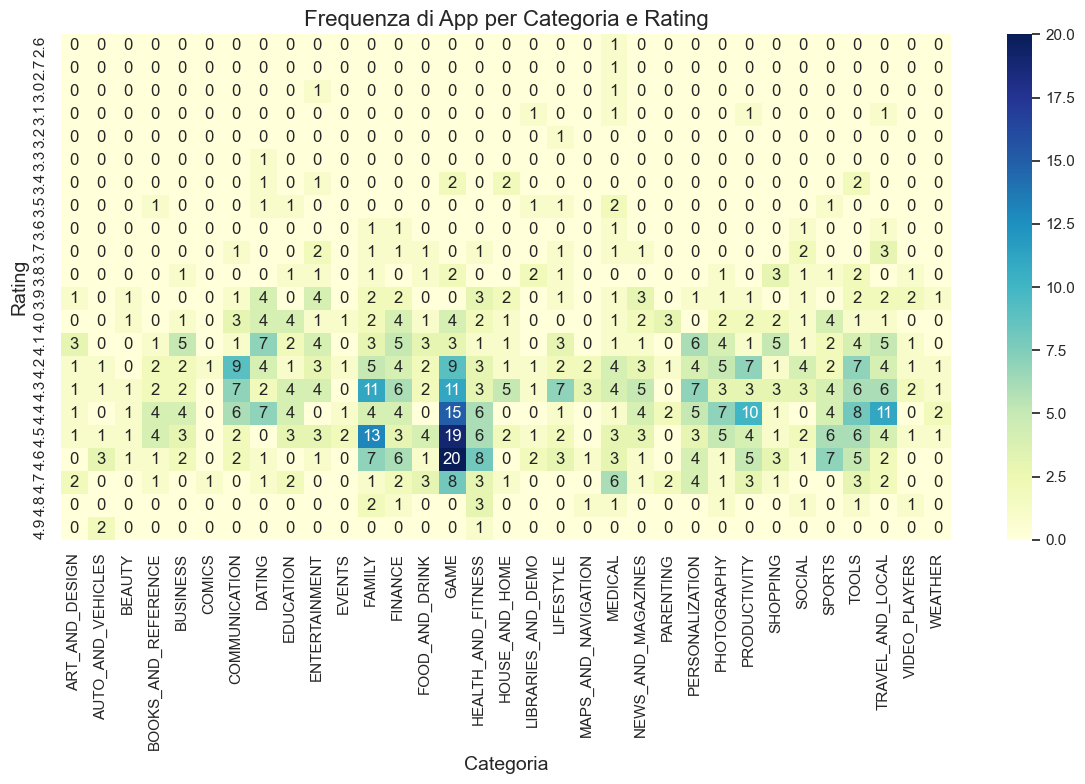

In [88]:
# Rimuovo eventuali duplicati di app
df_unique = df.drop_duplicates(subset='App')

# Creo una tabella di frequenza usando groupby e size
frequency_table = df_unique.groupby(['Rating', 'Category']).size().unstack(fill_value=0)

# Visualizzazione della tabella di frequenza con una heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequenza di App per Categoria e Rating', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

Il grafico rappresenta la frequenza delle app suddivise per categoria e rating, visualizzato attraverso una heatmap. 

- **Asse X (Categoria)**: Questo asse mostra le diverse categorie di applicazioni, come giochi, social media, produttività, ecc. Ogni categoria è rappresentata come una colonna nella heatmap.

- **Asse Y (Rating)**: L'asse Y rappresenta i diversi punteggi di rating delle applicazioni, che possono variare da valori più bassi (ad esempio, 1) a valori più alti (ad esempio, 5). Ogni rating è indicato come una riga nella heatmap.

- **Valori nel grafico**: I valori all'interno della heatmap indicano la frequenza delle applicazioni per ciascuna combinazione di categoria e rating. Le celle colorate in diverse tonalità di blu e verde rappresentano queste frequenze, dove i colori più scuri indicano una maggiore concentrazione di app con quel particolare rating nella categoria corrispondente.

In sintesi, questa visualizzazione aiuta a identificare quali categorie di applicazioni tendono ad avere punteggi di rating più elevati e quali hanno meno frequenza.


Dalla heatmap, emergono le seguenti osservazioni riguardanti le categorie di interesse:

- **News and Magazines**: Le app tendono ad avere rating medi (3.5-4.5), senza eccellere nei punteggi più alti. C'è un'opportunità per migliorare la qualità delle app in questo settore.
- **Social**: Anche qui le app si distribuiscono su rating medi, senza raggiungere i punteggi più alti. Questo indica uno spazio per innovare con app di migliore qualità.
- **Education**: Questa categoria si distingue positivamente, con diverse app che ottengono rating elevati (4.4-4.8), suggerendo un mercato solido e maturo per app di alta qualità.
- **Shopping**: La maggior parte delle app ha rating medi (3.6-4.3), con poche app che eccellono. Migliorare la qualità delle app in questo settore potrebbe rappresentare un vantaggio competitivo.
- **Books and Reference**: Le app si collocano principalmente nella fascia di rating medio (3.6-4.4). Anche qui si potrebbe sfruttare l'opportunità di offrire app di migliore qualità per ottenere punteggi più alti.

In sintesi, **Education** appare come una categoria solida, mentre le altre potrebbero beneficiare di app innovative e migliorate per elevare la soddisfazione degli utenti.


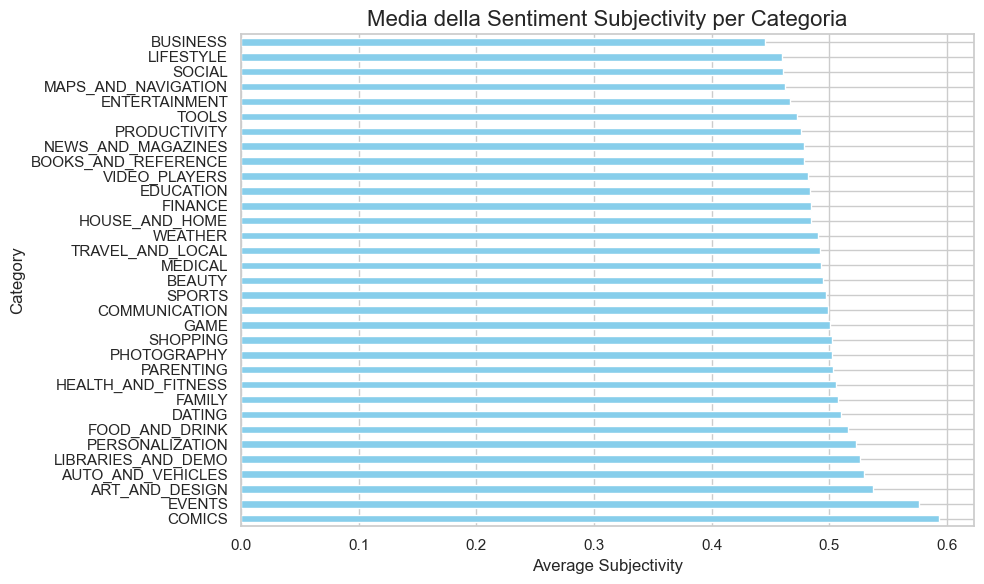

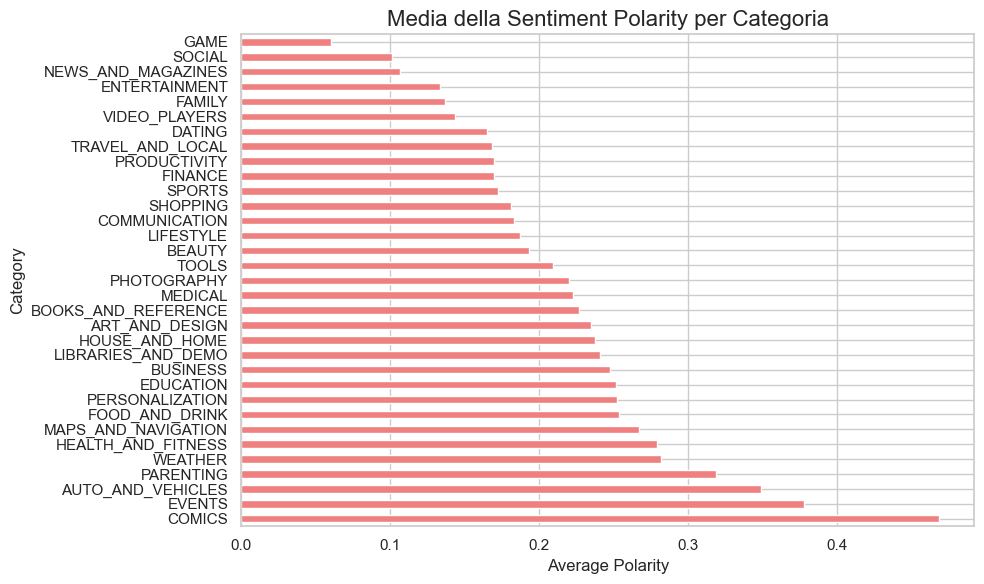

In [91]:
# Media del Sentiment Subjectivity per categoria
ss = df.groupby("Category").Sentiment_Subjectivity.mean()
sorted_ss = ss.sort_values(ascending=False)

# Creo un grafico a barre per la Sentiment Subjectivity per categoria
plt.figure(figsize=(10, 6))
sorted_ss.plot(kind='barh', color='skyblue')

plt.title('Media della Sentiment Subjectivity per Categoria', fontsize=16)
plt.xlabel('Average Subjectivity', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.tight_layout()
fig1 = plt.gcf()

# Media della Sentiment Polarity per ogni categoria
meansp = df.groupby("Category").Sentiment_Polarity.mean()
sorted_meansp = meansp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_meansp.plot(kind='barh', color='lightcoral')

plt.title('Media della Sentiment Polarity per Categoria', fontsize=16)
plt.xlabel('Average Polarity', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.tight_layout()
fig2 = plt.gcf()


**Spiegazione di Sentiment Subjectivity e Polarity**

- **Subjectivity**: Rappresenta il grado in cui un'espressione riflette opinioni personali, sentimenti o emozioni, piuttosto che fatti oggettivi. I testi ad alta soggettività esprimono sentimenti e valutazioni personali, mentre quelli a bassa soggettività tendono a presentare informazioni più oggettive e fattuali.

- **Polarity**: Indica la direzione e l'intensità del sentiment espresso. La polarità può variare da -1 (fortemente negativo) a +1 (fortemente positivo), con valori vicini a zero che indicano una neutralità. Questa misura aiuta a comprendere se il testo trasmette una valutazione positiva, negativa o neua.
 eventi.



L'analisi delle cinque categorie — **News and Magazines**, **Social**, **Education**, **Shopping**, e **Books and Reference** — ha rivelato informazioni preziose riguardo alla percezione degli utenti attraverso i loro feedback. L'incrocio tra **Sentiment Subjectivity** e **Sentiment Polarity** fornisce uno spaccato significativo della soddisfazione degli utenti e delle opportunità di mercato.

#### 1. News and Magazines
- **Subjectivity**: 0.478668
- **Polarity**: 0.106667
- **Insight**: Sebbene gli utenti esprimano opinioni personali, la bassa polarità suggerisce insoddisfazione generale. Questo potrebbe indicare problemi nella qualità dei contenuti o nelle funzionalità delle app. Le opportunità di miglioramento potrebbero includere l'ottimizzazione delle esperienze utente e il potenziamento della qualità informativa.

#### 2. Social
- **Subjectivity**: 0.460720
- **Polarity**: 0.101338
- **Insight**: Anche per questa categoria, la soggettività è alta, ma la polarità bassa evidenzia un'insoddisfazione diffusa. Le app social potrebbero non soddisfare le aspettative degli utenti in termini di interazione e funzionalità. C'è un potenziale per innovazioni che migliorino la qualità delle interazioni sociali e l'esperienza complessiva.

#### 3. Education
- **Subjectivity**: 0.483905
- **Polarity**: 0.251392
- **Insight**: Questa categoria mostra una polarità più alta, indicando che gli utenti hanno opinioni generalmente positive. Ciò suggerisce che le app educative soddisfano le esigenze degli utenti, rappresentando una nicchia promettente per lo sviluppo di nuove applicazioni. La combinazione di soggettività e polarità positiva suggerisce una forte reputazione tra gli utenti.

#### 4. Shopping
- **Subjectivity**: 0.502155
- **Polarity**: 0.181029
- **Insight**: Sebbene la soggettività sia alta, la polarità relativamente bassa indica che ci sono insoddisfazioni nel mercato dello shopping. Le recensioni suggeriscono che gli utenti sono coinvolti, ma possono avere aspettative non soddisfatte. Ciò crea opportunità per migliorare l'esperienza di acquisto, come attraverso funzionalità innovative o migliori pratiche di assistenza al cliente.

#### 5. Books and Reference
- **Subjectivity**: 0.478852
- **Polarity**: 0.226526
- **Insight**: Gli utenti mostrano una buona soggettività e una polarità positiva in questa categoria. Questo suggerisce che le app di libri e riferimento sono generalmente apprezzate, il che implica un potenziale di crescita per applicazioni che offrono esperienze uniche e coinvolgenti, come letture personalizzate o funzionalità interattive.

### Conclusione
In sintesi, l'analisi ha evidenziato che le categorie **News and Magazines** e **Social** necessitano di attenzione per affrontare le problematiche di insoddisfazione. Al contrario, le categorie **Education** e **Books and Reference** offrono un ambiente favorevole per lo sviluppo di nuove app. Anche la categoria **Shopping** ha un forte coinvolgimento degli utenti, ma richiede miglioramenti. Questa comprensione delle dinamiche di mercato è cruciale per le aziende che intendono lanciare applicazioni in questi spazi, consentendo loro di progettare prodotti che rispondano meglio alle esigenze e alle aspettative degli utenti.


In [94]:
# App e rating associato ad ogni app in DESC
new = df[["App","Rating"]]
nodup = new.drop_duplicates(subset = "App")
sorted = nodup.sort_values(by = "Rating", ascending = False)

In [95]:
# Numero di app a pagamento
df[df["Type"] != "Free"]["App"].drop_duplicates().size

9

In [96]:
# Nomi app a pagamento
payxapp =df[df["Type"] != "Free"]["App"].drop_duplicates()

## 3.2 Correlazione tra variabili

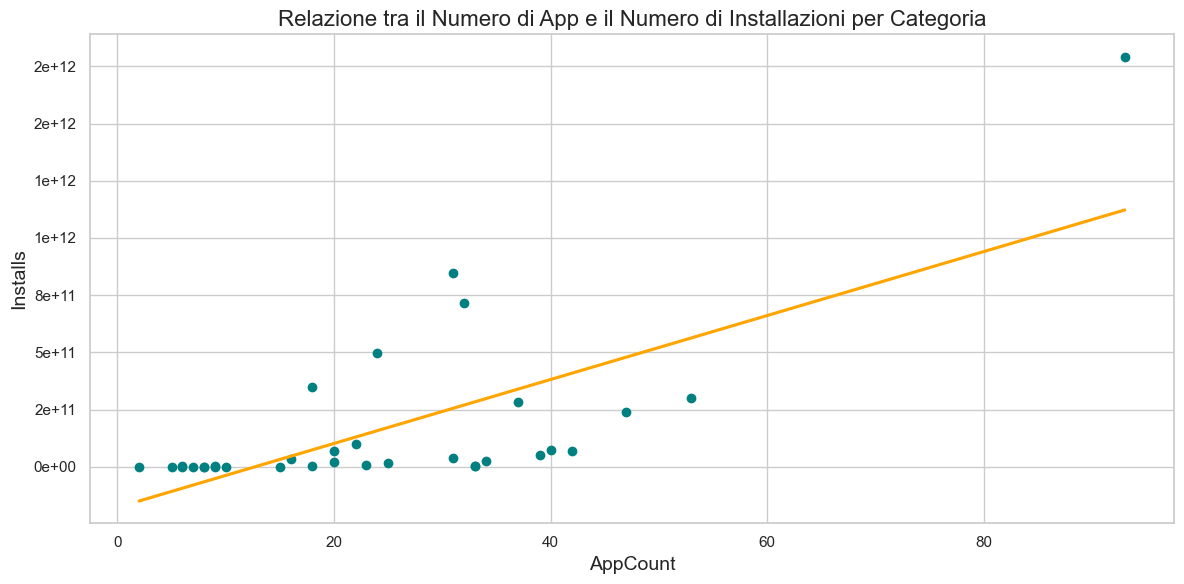

In [107]:
# Esegui il merge dei due DataFrame (df_appxcat e df_instxcat) basato sulla colonna comune
merged_data2 = pd.merge(df_appxcat, df_instxcat, on='Category', how='inner')

# Creo il grafico a dispersione
plt.figure(figsize=(12, 6))
plt.scatter(x=merged_data2['AppCount'], y=merged_data2['Installs'], color='teal')

plt.title('Relazione tra il Numero di App e il Numero di Installazioni per Categoria', fontsize=16)
plt.xlabel('Numero di App', fontsize=14)
plt.ylabel('Numero di Installazioni (in miliardi)', fontsize=14)

# Aggiungo una linea di regressione per una visualizzazione migliore
sns.regplot(x=merged_data2['AppCount'], y=merged_data2['Installs'], scatter=False, color='orange', ci=None)

# Formatto l'asse y per la notazione scientifica
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0e}'))

plt.tight_layout()
plt.show()



Dal grafico emerge una **relazione positiva** tra il numero di app disponibili in una categoria e il numero medio di installazioni, come evidenziato dalla linea di regressione. Tuttavia, è interessante osservare che:

- **Alcune categorie, nonostante abbiano un numero relativamente ridotto di app, riescono a ottenere un elevato numero di installazioni.** Questo fenomeno potrebbe indicare la presenza di mercati non saturi, dove la domanda degli utenti è significativa, ma la concorrenza tra le app è limitata.
  
- D'altra parte, categorie con un numero maggiore di app mostrano un incremento nelle installazioni, ma non sempre proporzionale. Questo potrebbe suggerire una **saturazione di mercato** in alcune categorie, dove la concorrenza è più forte e diventa difficile emergere.

In conclusione, categorie con un numero ridotto di app ma un alto numero di installazioni potrebbero rappresentare **opportunità strategiche** per il lancio di nuove app, offrendo potenzialmente meno competizione e una domanda ancora in crescita.


In [110]:
# Stats per ogni categoria
category_stats = df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).reset_index()

# Aggiungo una colonna con il numero di app per categoria
category_stats['app_count'] = df.groupby('Category')['App'].nunique().values

# Mostro il DataFrame risultante
category_stats.sort_values(by = "total_installs", ascending = False)

,Category,avg_rating,total_reviews,total_installs,app_count
14,GAME,4.460444,103100756108,1792279600000,93
24,PHOTOGRAPHY,4.378911,10740708812,846456000000,31
6,COMMUNICATION,4.226424,4402039246,714217000000,33
21,NEWS_AND_MAGAZINES,4.177132,741532668,497925800000,24
27,SOCIAL,4.212947,23104406633,347549100000,18
11,FAMILY,4.380017,18551241181,298551640000,82
25,PRODUCTIVITY,4.395867,3615999294,283493300000,37
29,TOOLS,4.271628,2638384440,237093800000,47
8,EDUCATION,4.486954,6094479962,98265590000,22
15,HEALTH_AND_FITNESS,4.423118,2551488486,71948300000,40


In [112]:
# Stats per ogni categoria
category_stats = df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).reset_index()

# Calcolo il numero di app uniche per categoria
app_count = df.groupby('Category')['App'].nunique().reset_index(name='app_count')

# Unione di app_count con category_stats sulla colonna 'Category'
category_stats = pd.merge(category_stats, app_count, on='Category')

# Calcolo della mediana del numero di app per categoria
app_count_median = category_stats['app_count'].median()

print(f"La mediana del numero di app per categoria è: {app_count_median}")


La mediana del numero di app per categoria è: 22.0


### Categorie con Poche App e Molte Installazioni

Di seguito sono elencate le prime 5 categorie in ordine di installazioni, che hanno meno di 25 app:

1. **BUSINESS**
   - **Installazioni:** 19.544.600.000
   - **App Count:** 20

2. **SOCIAL**
   - **Installazioni:** 34.754.910.000
   - **App Count:** 18

3. **EDUCATION**
   - **Installazioni:** 98.265.590.000
   - **App Count:** 22

4. **SHOPPING**
   - **Installazioni:** 66.968.000.000
   - **App Count:** 20

5. **BOOKS_AND_REFERENCE**
   - **Installazioni:** 35.380.100.000
   - **App Count:** 16

Queste categorie rappresentano un interessante caso di studio, in quanto mostrano come ci siano categorie con un numero relativamente ridotto di app ma che riescono a ottenere un elevato numero di installazioni. Questo fenomeno indica che, contrariamente alla logica lineare osservata nel grafico precedente (dove le categorie con più app tendono ad avere anche più installazioni), esistono mercati che possono essere altamente appetibili nonostante una bassa concorrenza in termini di numero di app.

L'esplorazione del dataset continua ora con l'analisi della relazione tra Numero di App e Media dei Rating per Categoria.

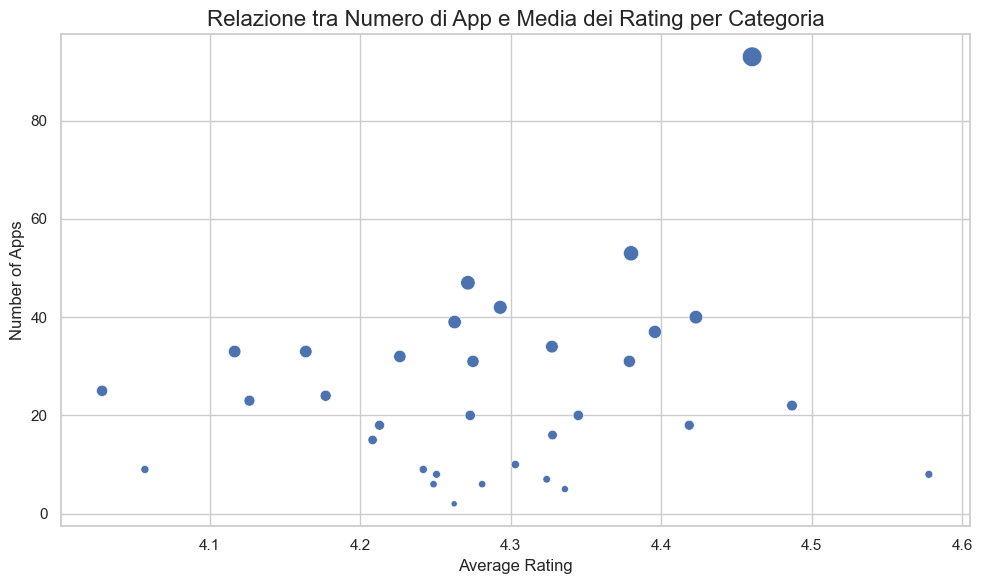

In [114]:
# Relazione tra Numero di App e Media dei Rating per Categoria

merged = pd.merge(df_meansorted, df_appxcat, on="Category")

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(x=merged["AvgRating"], 
                          y=merged["AppCount"], 
                          size=merged["AppCount"],  # Dimensione del punto in base al numero di app
                          sizes=(20, 200),         # Dimensione dei punti tra 20 e 200
                          legend=False)            # Nascondi la legenda per semplificare

plt.title('Relazione tra Numero di App e Media dei Rating per Categoria', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

plt.tight_layout()

plt.show()

In [116]:
# Calcolo la mediana del numero di app e del rating medio
app_count_median = merged["AppCount"].median()
# Calcolo la media dei rating
avg_rating_threshold = merged['AvgRating'].median()

# Filtra le applicazioni in base ai criteri aggiornati
few_apps_high_rating = merged[(merged["AppCount"] < 25) & (merged["AvgRating"] > avg_rating_threshold)]

# Visualizzo le categorie che soddisfano questi criteri
print(few_apps_high_rating[["AppCount", "AvgRating"]])

                     AppCount  AvgRating
Category                                
AUTO_AND_VEHICLES           8   4.577855
EDUCATION                  22   4.486954
FOOD_AND_DRINK             18   4.418676
SHOPPING                   20   4.344965
EVENTS                      5   4.336076
BOOKS_AND_REFERENCE        16   4.327853
MAPS_AND_NAVIGATION         7   4.323958
ART_AND_DESIGN             10   4.303141
WEATHER                     6   4.281116


In base al rapporto tra il numero di applicazioni e il rating medio, le seguenti categorie rappresentano le migliori opzioni per il lancio di una nuova app, considerando sia la quantità di app disponibili che l'elevata soddisfazione degli utenti:

| Categoria                    | AppCount | AvgRating |
|------------------------------|----------|-----------|
| **AUTO_AND_VEHICLES**         | **8**    | **4.58**  |
| **EDUCATION**                 | **22**   | **4.49**  |
| **FOOD_AND_DRINK**            | **18**   | **4.42**  |
| **SHOPPING**                  | **20**   | **4.34**  |
| **EVENTS**                    | **5**    | **4.34**  |
| **BOOKS_AND_REFERENCE**       | **16**   | **4.33**  |
| **MAPS_AND_NAVIGATION**       | **7**    | **4.32**  |
| **ART_AND_DESIGN**            | **10**   | **4.30**  |
| **WEATHER**                   | **6**    | **4.28**  |

Queste categorie offrono un ottimo equilibrio tra numero di app e rating medio, con la categoria **Education** che si distingue per un elevato numero di app e un rating medio molto competitivo (4.49). Questo suggerisce che lanciare un'app in una di queste categorie potrebbe rappresentare una buona opportunità per ottenere successo, combinando soddisfazione degli utenti e un mercato non troppo saturo.


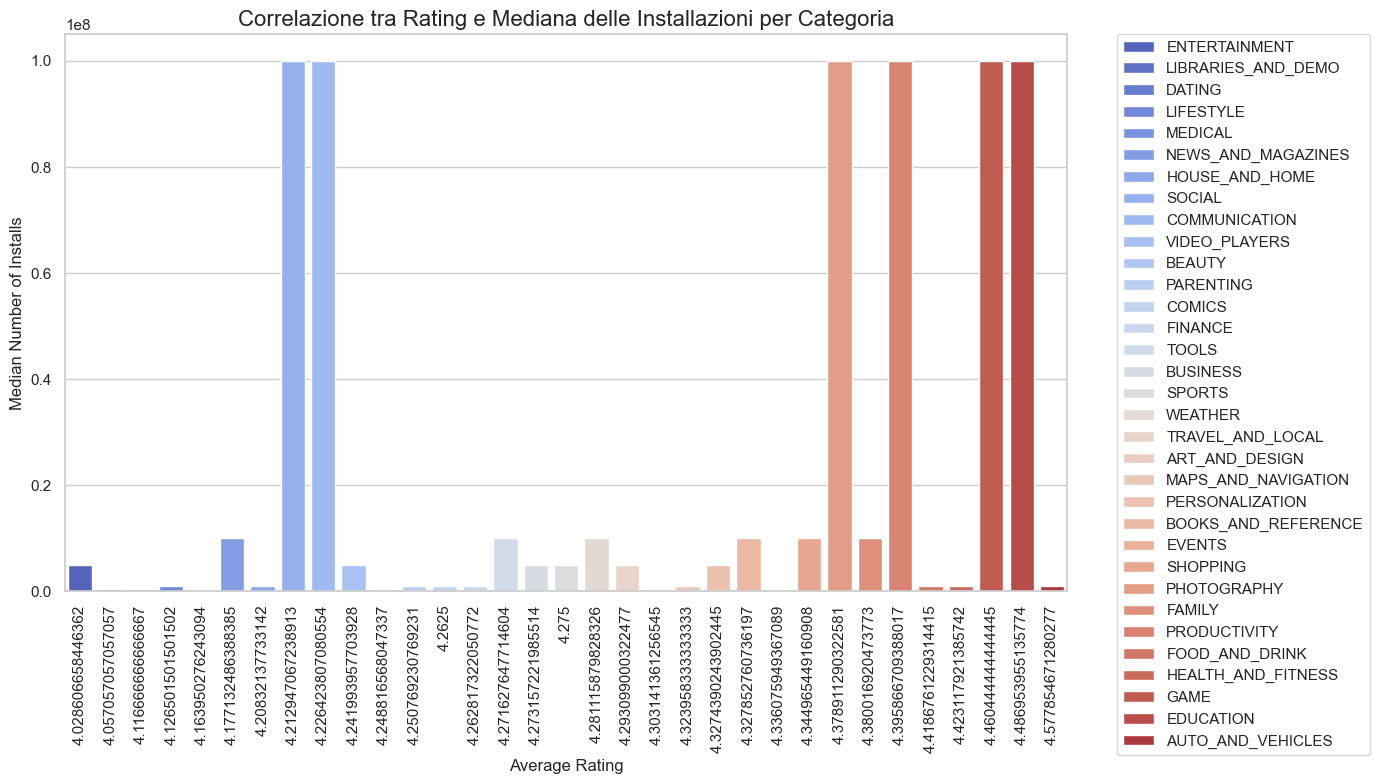

In [118]:
# Correlazione tra Rating e Mediana delle Installazioni per Categoria

stats_category = df.groupby('Category').agg({
    'Rating': 'mean',       
    'Installs': 'median'    
}).reset_index()

# Ordino per mediana delle installazioni
stats_category = stats_category.sort_values(by='Installs', ascending=False)

# Creo il grafico con seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Rating', y='Installs', hue='Category', data=stats_category, palette='coolwarm')

plt.title('Correlazione tra Rating e Mediana delle Installazioni per Categoria', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Median Number of Installs', fontsize=12)

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

plt.show()


In [120]:
# Calcolo la mediana delle installazioni e la media dei rating
install_median = stats_category['Installs'].median()
rating_mean = stats_category['Rating'].mean()

# Filtro le categorie con installazioni inferiori alla mediana e rating superiori alla media
filtered_stats = stats_category[(stats_category['Installs'] < install_median) & 
(stats_category['Rating'] > rating_mean)]

# Ordino per rating medio più alto
filtered_stats = filtered_stats.sort_values(by='Rating', ascending=False)

# Seleziono le prime 5 categorie
top_5_categories = filtered_stats.head(10)

top_5_categories


,Category,Rating,Installs
1,AUTO_AND_VEHICLES,4.577855,1000000.0
15,HEALTH_AND_FITNESS,4.423118,1000000.0
13,FOOD_AND_DRINK,4.418676,1000000.0
10,EVENTS,4.336076,100000.0
19,MAPS_AND_NAVIGATION,4.323958,1000000.0
0,ART_AND_DESIGN,4.303141,500000.0


Migliori Categorie di App

Le seguenti categorie rappresentano le migliori in base al rapporto tra il numero di applicazioni e il rating medio:

| Categoria                    | AppCount | AvgRating |
|-----------------------------|----------|-----------|
| **AUTO_AND_VEHICLES**       | **8**    | **4.58**  |
| **FOOD_AND_DRINK**          | **18**   | **4.42**  |
| **SHOPPING**                | **20**   | **4.34**  |
| **EVENTS**                  | **5**    | **4.34**  |
| **BOOKS_AND_REFERENCE**     | **16**   | **4.33**  |
| **MAPS_AND_NAVIGATION**     | **7**    | **4.32**  |
| **ART_AND_DESIGN**          | **10**   | **4.30**  |
| **WEATHER**                 | **6**    | **4.28**  |

Queste categorie offrono un eccellente equilibrio tra quantità di app e qualità del rating, dimostrando che esiste una vasta gamma di opzioni altamente valutate per gli utenti.


## 3.3 Identificazione Outlier

**Per identificare gli outlier ho utilizzato il metodo dell'intervallo interquartile (IQR).**

**Ho calcolato il primo quartile (Q1), il terzo quartile (Q3) e l'IQR (Q3 - Q1).**

**Gli outlier sono i valori al di sopra di Q3 + 1.5 * IQR o al di sotto di Q1 - 1.5 * IQR.**

L'analisi degli outlier è particolarmente rilevante nel contesto delle recensioni degli utenti, poiché ci permette di individuare valutazioni che si discostano significativamente dalla media. In questo progetto, abbiamo scelto di includere sia la **sentiment polarity** che la **sentiment subjectivity** come indicatori chiave delle recensioni. 

Questi due aspetti forniscono un'idea più chiara dell'orientamento degli utenti rispetto all'app. La **sentiment polarity** ci aiuta a capire se le recensioni sono positive, negative o neutre, mentre la **sentiment subjectivity** ci fornisce informazioni su quanto le opinioni siano personali e soggettive. 

Analizzando insieme questi indicatori, è possibile ottenere un quadro più completo delle reazioni degli utenti e identificare eventuali outlier nelle recensioni. Questi outlier possono indicare esperienze eccezionali—sia positive che negative—che meritano ulteriori approfondimenti e possono offrire spunti preziosi per migliorare l'app e il suenuto.
QR.**


In [ ]:
# Boxplot della Soggettività del Sentiment per Categoria

plt.figure(figsize=(10, 6))  
sns.boxplot(y=sorted_ss)  

plt.title('Boxplot della Soggettività del Sentiment per Categoria', fontsize=16)
plt.ylabel('Soggettività del Sentiment', fontsize=14)

plt.tight_layout()


In [ ]:
# Calcolo del primo e terzo quartile
Q1 = sorted_ss.quantile(0.25)
Q3 = sorted_ss.quantile(0.75)
IQR = Q3 - Q1

# Limiti per gli outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filtro gli outlier
outliers = sorted_ss[(sorted_ss > upper_bound) | (sorted_ss < lower_bound)]

outliers


### Esclusione delle Categorie Associate agli Outlier della Sentiment Subjectivity

Escludere le categorie associate agli outlier nella **Sentiment Subjectivity** può essere una strategia efficace per evitare dati distorti, recensioni inaffidabili e categorie con rischi elevati, come la polarizzazione o la mancanza di coinvolgimento emotivo.

Concentrarsi su categorie con recensioni più equilibrate e costruttive permette di basare il lancio di una nuova app su **feedback più affidabili** e **insight concreti**. Pertanto, si consiglia di concentrarsi sulle categorie che rientrano nel **range di soggettività compreso tra 0.48 e 0.52**.

Evitare gli outlier, nonché le categorie troppo soggettive o troppo oggettive, consente di raccogliere informazioni basate su **recensioni più bilanciate e affidabili**. Questo approccio riduce il rischio di basarsi su dati estremi o polarizzati che potrebbero portare a decisioni strategiche errate.


In [ ]:
# Filtro le categorie nel range di Sentiment_Subjectivity
range_filtered = sorted_ss[(sorted_ss >= 0.48) & 
                                (sorted_ss <= 0.52)]

range_filtered

Considerazioni sulle Categorie di Sentiment Subjectivity

Nella nostra analisi ci siamo concentrati su cinque categorie principali: **AUTO_AND_VEHICLES**, **EDUCATION**, **GAME**, **HEALTH_AND_FITNESS** e **FOOD_AND_DRINK**. Esaminando le categorie con un Sentiment Subjectivity compreso tra **0.48** e **0.52**, notiamo che:

- **EDUCATION** è già presente in questa lista con un valore di **0.483905**.
- **FOOD_AND_DRINK** ha un valore di **0.516170**, che si avvicina al limite superiore della nostra analisi.

Queste due categorie, in particolare **EDUCATION**, meritano una maggiore attenzione poiché indicano un potenziale di sentiment positivo da parte degli utenti, suggerendo che queste app potrebbero beneficiare di ulteriori strategie di marketing e miglioramenti per aumentare il loro impatto nel mercato. Dato che abbiamo già osservato un rating medio elevato per **EDUCATION** e **HEALTH_AND_FITNESS**, è fondamentale monitorare anche il Sentiment Subjectivity in queste categorie per ottimizzare ulteriormente le nostre strategie.


Analisi della Sentiment Polarity nell'App per la Cultura

Nell'ambito dello sviluppo di un'app destinata alla diffusione della cultura, l'analisi della **sentiment polarity** riveste un'importanza fondamentale. Questa metrica consente di valutare la reazione degli utenti rispetto ai contenuti offerti, fornendo un'indicazione chiara su quanto questi siano apprezzati e considerati utili per l'informazione.

Perché Scegliere la Sentiment Polarity

La scelta di focalizzarsi sulla sentiment polarity piuttosto che sulla sentiment subjectivity è motivata dalla necessità di ottenere feedback diretto e misurabile sull'apprezzamento dei contenuti. Mentre la polarità indica se il sentiment è positivo, negativo o neutro, la soggettività si concentra più sulle opinioni personali degli utenti. 

Nel contesto di un'app culturale, è fondamentale comprendere non solo se gli utenti apprezzano i contenuti, ma anche quanto li ritengono utili per il loro processo di apprendimento e informazione. L'analisi della polarità fornisce dati immediati su come il pubblico percepisce l'app e i suoi contenuti, permettendo un adattamento rapido delle strategie editoriali.

Inoltre, monitorare la sentiment polarity consente di identificare tendenze nel gradimento dei contenuti, facilitando decisioni strategiche su quali argomenti approfondire o modificare. In questo modo, l'app non solo funge da strumento di apprendimento, ma diventa anche un ambiente dinamico in cui gli utenti possono interagire con la cultura in modo significativo e gratificante.


In [ ]:
# Boxplot della Polarity del Sentiment per Categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x=sorted_meansp)
plt.title("Boxplot della Polarity del Sentiment per Categoria", fontsize=14)
plt.xlabel("Sentiment Polarity", fontsize=12)
plt.grid(True)

In [ ]:
# Calcolo del primo e terzo quartile
Q1 = sorted_meansp.quantile(0.25)
Q3 = sorted_meansp.quantile(0.75)
IQR = Q3 - Q1

# Definizione dei limiti per gli outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificazione delle categorie che sono outlier
outliers = sorted_meansp[(sorted_meansp < lower_bound) | 
                         (sorted_meansp > upper_bound)]

print("Outlier delle Sentiment Polarity:")
print(outliers)


In [ ]:
# Calcolo del primo e terzo quartile
Q1 = sorted_meansp.quantile(0.25)
Q3 = sorted_meansp.quantile(0.75)

# Filtro le categorie comprese tra Q1 e Q3
categories_between_Q1_Q3 = sorted_meansp[(sorted_meansp >= Q1) & (sorted_meansp <= Q3)]

print("Categorie comprese tra il 1° e il 3° quartile:")
print(categories_between_Q1_Q3)


Tra le categorie di interesse **AUTO_AND_VEHICLES**, **EDUCATION**, **GAME**, **HEALTH_AND_FITNESS** e **FOOD_AND_DRINK**, possiamo osservare che:

- **EDUCATION**: Questa categoria tende ad avere una buona **sentiment polarity** perché le applicazioni educative, come quelle per l'apprendimento di lingue o competenze professionali, spesso ricevono feedback positivi da parte degli utenti. Gli utenti apprezzano contenuti di qualità che migliorano le loro capacità e conoscenze.

- **HEALTH_AND_FITNESS**: Questa categoria gode di una polarità positiva poiché molte persone sono sempre più consapevoli della loro salute e benessere. Le applicazioni che offrono programmi di allenamento, monitoraggio della salute e consigli nutrizionali tendono a ricevere recensioni favorevoli.

- **FOOD_AND_DRINK**: Le applicazioni legate al cibo e alle bevande possono avere una buona **sentiment polarity** perché spesso soddisfano il desiderio degli utenti di scoprire nuove ricette, ristoranti e stili di vita alimentari. Le recensioni tendono ad essere positive quando le app riescono a rispondere alle esigenze gastronomiche degli utenti.

- **AUTO_AND_VEHICLES** e **GAME**: Anche se non si possono sempre escludere dalla lista delle categorie con buone recensioni, le loro esperienze possono variare notevolmente in base alla qualità specifica delle app. Le applicazioni per veicoli possono affrontare problematiche tecniche, mentre i giochi possono essere soggetti a critiche in base alla loro modalità di gioco e alla soddisfazione dell'utente.

In generale, le categorie con una buona **sentiment polarity** tendono a fornire valore reale, soddisfando le esigenze e le aspettative degli utenti, il che si traduce in recensioni positive e feedback favorevoli.


# 4. Conclusioni

## Conclusione del Progetto

In seguito all'analisi condotta, ho identificato la **categoria Education** come la scelta ideale per il lancio di un'app che possa avere un impatto positivo nella vita quotidiana delle persone.  


Durante l'analisi, abbiamo preso in considerazione le seguenti metriche chiave per guidare la scelta della categoria migliore:

- **Sentiment Polarity**:  
  Questa metrica misura la positività delle recensioni degli utenti. La categoria **Education** ha dimostrato una polarità significativamente positiva, con un valore di **0.251392**, indicativo di un forte apprezzamento da parte degli utenti.

- **Sentiment Subjectivity**:  
  Questo indicatore misura il grado di soggettività nelle recensioni. **Education** ha registrato un valore di **0.483905**, bilanciando opinioni personali con una visione generalmente positiva, suggerendo una buona percezione generale delle app.

- **Numero di Installazioni e App Disponibili**:  
  **Education** conta 22 app con un totale di **98.265.590.000 installazioni**, dimostrando un forte interesse da parte degli utenti nonostante la relativa scarsità di app disponibili, un segnale di **mercato attivo**.

- **Numero di App e Rating Medio**:  
  **Education** si distingue per un elevato numero di app e un rating medio molto competitivo **(4.49)**. Questo suggerisce che lanciare un'app in una di queste categorie potrebbe rappresentare una buona opportunità per ottenere successo, combinando soddisfazione degli utenti e un mercato non troppo saturo.

Questi dati ci permettono di affermare che la categoria **Education** è un ambiente fertile e favorevole per il lancio di un'app in grado di massimizzare sia l'impatto sociale che il successo commerciale.


## Perché la Categoria Education?

- **Impatto positivo**:  
  Le app educative sono già riconosciute per il loro elevato livello di soddisfazione tra gli utenti, come dimostrato dalla sentiment analysis, che ha rilevato una polarità positiva significativa nelle recensioni. Gli utenti vedono un valore tangibile in queste app, che non si limitano a intrattenere, ma contribuiscono attivamente al miglioramento della loro vita quotidiana.
  
- **Strumento di empowerment**:  
  In particolare, un'app nell'ambito educativo potrebbe rivelarsi cruciale per l'alfabetizzazione e l'educazione in paesi meno sviluppati. In molte regioni del mondo, lo smartphone rappresenta il primo vero accesso a risorse educative, ed è un mezzo potente per **democratizzare l'accesso all'istruzione**. La diffusione di app educative potrebbe colmare il divario formativo, offrendo contenuti didattici anche a chi ha limitato accesso alle scuole tradizionali.
  
- **Utilizzo consapevole del digitale**:  
  Creare un'app educativa che stimoli l'apprendimento, la creatività e la crescita personale può giocare un ruolo importante nel contrastare gli aspetti negativi dell'uso eccessivo degli smartphone, come la dipendenza digitale. Un'app progettata con attenzione potrebbe promuovere **un uso più equilibrato e consapevole del tempo passato al cellulare**, trasformando il dispositivo in uno strumento di crescita anziché di distrazione.

- **Adattabilità e crescita personale**:  
  Le app educative offrono la flessibilità di imparare ovunque e in qualsiasi momento. In un mondo sempre più frenetico, la possibilità di dedicare piccoli momenti della giornata all'apprendimento di nuove competenze può avere un impatto profondo sulla qualità della vita degli utenti. Che si tratti di imparare una nuova lingua, sviluppare competenze tecniche o ricevere formazione professionale, la categoria **Education** può soddisfare queste esigenze in modo efficace.

L'obiettivo del progetto era quello di trovare una categoria in cui sviluppare un'app che potesse **migliorare l'esperienza degli utenti** e contribuire positivamente al loro benessere, senza cadere negli eccessi e negli effetti negativi legati all'uso compulsivo del cellulare.  
La categoria **Education** risponde perfettamente a questa missione, grazie alla sua capacità di offrire strumenti e contenuti che aiutano gli utenti a migliorare le proprie competenze, sviluppare nuove abilità e accedere a opportunità di apprendimento significative.
